#### **Problem Statements**
A real estate company has datasets for that contain descriptive criteria of the hoouse they sold. They want to improve the sales and predict the price of their future new house. 

This project is focus on develop a machine learning model that able to extract the different criteria that play a big role in determining the hous price. It also optimize sales based specifying some feature of  the future house. It will guess the price of the house as accurate possible depending on the information feed from the Ames, CA


- Want to know which criteria has main impact on determine the house price
- create a multi linear regression to predict the price of the hase based on the import features
- They want to know the performance of this model, how well the model predict the price.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [167]:
#Import the housing training and testing datasets
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv("datasets/test.csv")

In [168]:
# train_data["Age Sold"] 

In [169]:
train_data.shape

(2051, 81)

In [170]:
 train_data.isnull().sum().sort_values(ascending = False)[:10]

Pool QC          2042
Misc Feature     1986
Alley            1911
Fence            1651
Fireplace Qu     1000
Lot Frontage      330
Garage Finish     114
Garage Qual       114
Garage Yr Blt     114
Garage Cond       114
dtype: int64

In [171]:
len(train_data.columns)

81

In [172]:
train_data['Full Bath'].value_counts()

2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64

In [173]:
# train_data.columns

### Examine and Explore the Data

In [174]:
# Check the shape of the traing and testing datasets
train_data.shape, test_data.shape

((2051, 81), (878, 80))

In [175]:
set(train_data)-set(test_data)

{'SalePrice'}

In [177]:
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [178]:
# set the indes as the id columnd
train_data.set_index("Id", inplace = True)
test_data.set_index("Id", inplace = True)

In [179]:
train_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [180]:
test_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [181]:
#Chech the null values in each columns and sort them
train_data.isnull().sum().sort_values(ascending = False)[:20]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Full Bath       2
Bsmt Half Bath       2
dtype: int64

In [182]:
# drop the null cols
# test_data.drop(columns = na_drop_columns, inplace = True)
# train_data.drop(columns = na_drop_columns, inplace = True)

In [183]:
## Drope columns with 20% and above thier values are NaN
# The code from https://thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/
perc = 20.0
min_count =  int(((100-perc)/100)*train_data.shape[0] + 1)
train_data = train_data.dropna( axis=1, thresh=min_count)

In [184]:
train_data["Fireplaces"].isna().sum()

0

In [185]:
# for testing data
perc = 20.0 
min_count =  int(((100-perc)/100)*test_data.shape[0] + 1)
test_data = test_data.dropna( axis=1, thresh=min_count)


In [186]:
# fill smaller na values with moset commom one
train_data["Garage Qual"].fillna("TA", inplace = True)
test_data["Garage Qual"].fillna("TA", inplace = True)

In [187]:
train_data["Bsmt Exposure"].fillna("No", inplace = True)
test_data["Bsmt Exposure"].fillna("No", inplace = True)

In [188]:

## fill the na with the mean when the feature has normal dist
train_data["Lot Frontage"].fillna(train_data["Lot Frontage"].mean(), inplace = True)
test_data["Lot Frontage"].fillna(test_data["Lot Frontage"].mean(), inplace = True)

In [189]:
## fill very few na with 0
train_data.fillna(0, inplace = True)

In [190]:
test_data.fillna(0, inplace = True)

In [191]:
# Check how the Enclosed Porch distribution in the datasets
# train_data["Enclosed Porch"].value_counts()[:10]

In [192]:
train_data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage 

In [193]:
train_data['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [194]:
train_data['1st Flr SF'].value_counts()

864     31
1040    22
816     13
912     13
936     12
        ..
1740     1
1738     1
1736     1
1722     1
1987     1
Name: 1st Flr SF, Length: 915, dtype: int64

In [195]:
train_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


In [196]:
# sorted(data.isnull().sum())
len(train_data.columns)
# train_data.columns

75

# EDA
- Interpretation of the descriptive statistics and visulaization

## Examine the Descriptive statistics

In [197]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,5.354532e+08,907180080.0,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,5.000000e+01,70.0,190.0
Lot Frontage,2051.0,6.905520e+01,2.130636e+01,21.0,60.0,6.905520e+01,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9.430000e+03,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.000000e+00,7.0,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.000000e+00,6.0,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1.974000e+03,2001.0,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1.993000e+03,2004.0,2010.0
Mas Vnr Area,2051.0,9.862652e+01,1.743247e+02,0.0,0.0,0.000000e+00,159.0,1600.0
BsmtFin SF 1,2051.0,4.420848e+02,4.611950e+02,0.0,0.0,3.680000e+02,733.5,5644.0


**Interpretation of the Summary Statistcis**:

> - The sale has a mean of \$181469  and the std of $79258.66.

> - The minimum sale is \$12789/ and the maximum sale is $611657.

## Data Visualization

> ### Dependent and Independent Variable Interaction

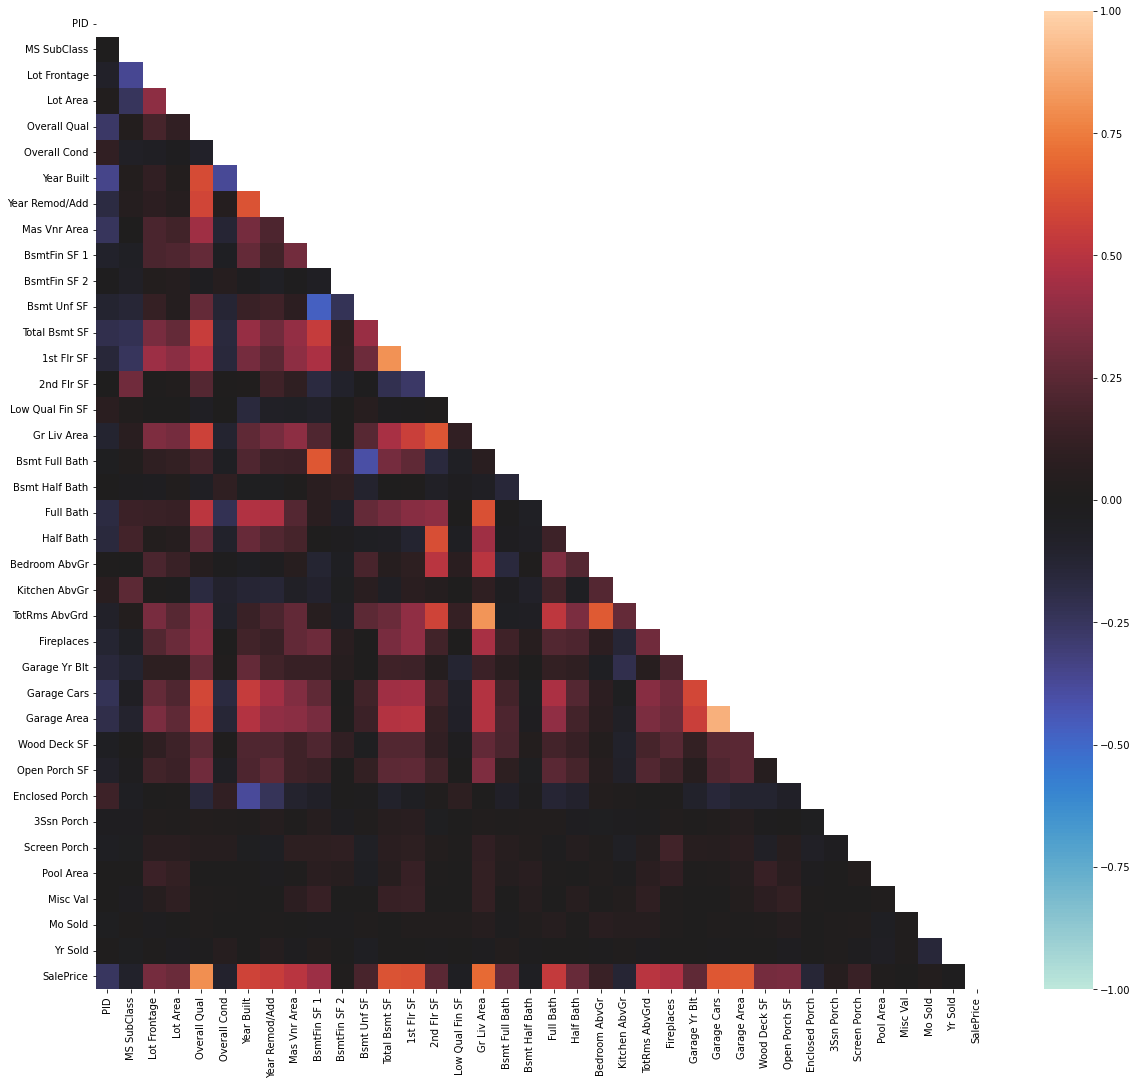

In [33]:
# the correlation matrix heatmap plot
plt.figure(figsize = (20, 18));
corr = train_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, cmap = "icefire");
plt.savefig('./plots/corr_heatmap.png')

**Interpretation:**
> - Lot area, over all qulaity, Live area, garage cars and garage area shows strong positive correlation
> - The is no features that shows a negtative correlation with the sales price

## Independant Variable Distribution Visualization

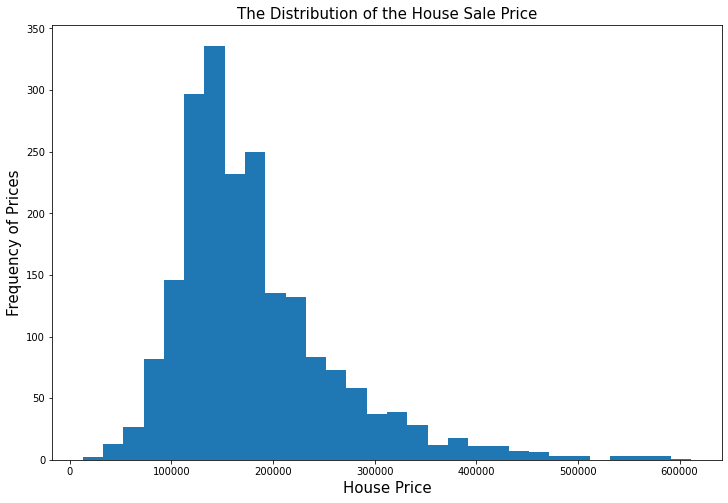

In [198]:

# Explore the sale price distribution pattern
plt.figure(figsize = (12, 8));
plt.hist(train_data["SalePrice"], bins = 30);
plt.title("The Distribution of the House Sale Price", fontsize = 15);
plt.xlabel("House Price", fontsize = 15);
plt.ylabel("Frequency of Prices", fontsize = 15);
plt.savefig('./plots/targte_dist.png')

**Interpretation:**
> - The target variable have very close to normal distributiona and not skewed. No need to apply any data transfomation

## Visualilzation With Boxplot For Catagorical Features

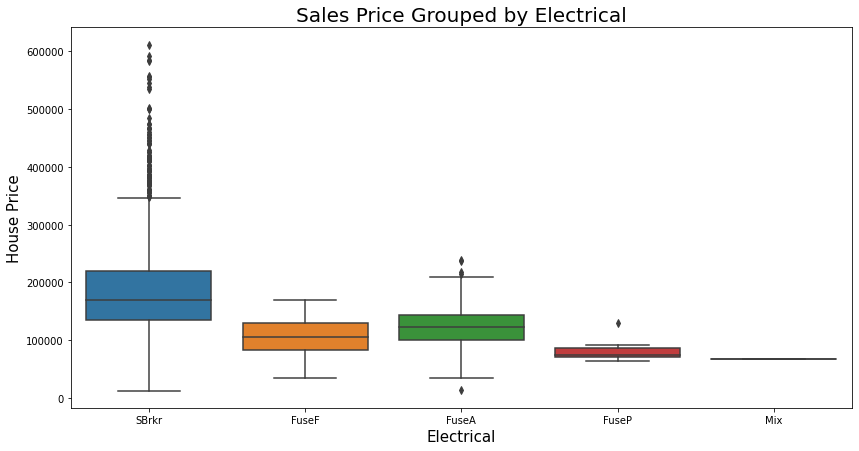

<Figure size 432x288 with 0 Axes>

In [199]:
# Boxplot by grouping with Electrical
plt.figure(figsize = (14, 7))
sns.boxplot( x=train_data["Electrical"], y=train_data["SalePrice"] );
plt.xlabel("Electrical", fontsize = 15);
plt.ylabel("House Price", fontsize = 15);
plt.title("Sales Price Grouped by Electrical", fontsize = 20);
plt.show()
plt.savefig('./plots/electrical_dist.png')

**Interpretation:**
> - House with SBrkr electric has larger average price compare to house with other electrical type
> - House with SBrkr electric has may upper outlier price
> - There are very few house with Mix electrical

In [36]:
# train_data["Mas Vnr Type"].value_counts()
# plt.figure(figsize = (14, 7))
# sns.boxplot( x=train_data["Mas Vnr Type"], y=train_data["SalePrice"] );
# plt.xlabel("Mas Vnr Type", fontsize = 15);
# plt.ylabel("House Price", fontsize = 15);
# plt.title("Sales Price Grouped by Mas Vnr Type", fontsize = 20);
# plt.show()

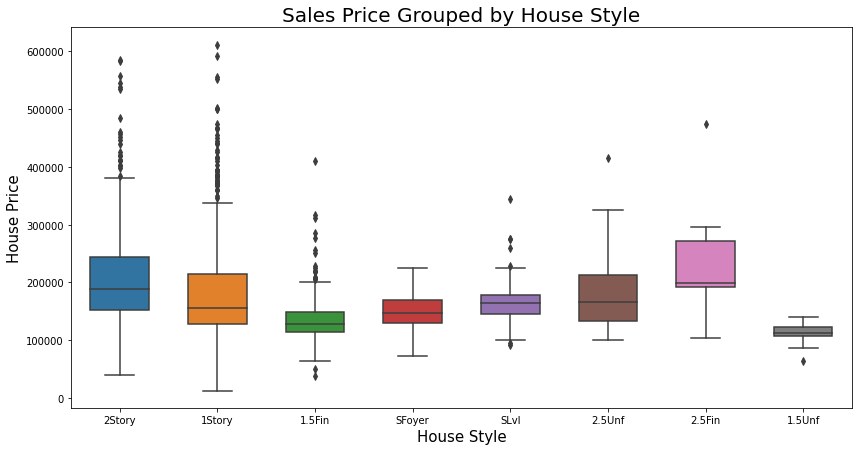

<Figure size 432x288 with 0 Axes>

In [200]:
# House Style
train_data["House Style"].value_counts()
plt.figure(figsize = (14, 7))
sns.boxplot( x=train_data["House Style"], y=train_data["SalePrice"], width=.6);
plt.xlabel("House Style", fontsize = 15);
plt.ylabel("House Price", fontsize = 15);
plt.title("Sales Price Grouped by House Style", fontsize = 20);
plt.show()
plt.savefig('./plots/house_style.png')

**Interpretation:**
> - The house with 2 story sytle has more expensive than 1 story on average, but te 1 story ihas more out liers
> - Few houses has 1.5 Unf style and they have quite cheaper than other house styles.
> - House with 2.5 Unf style are cheaper than 2.5 Fin styled houses

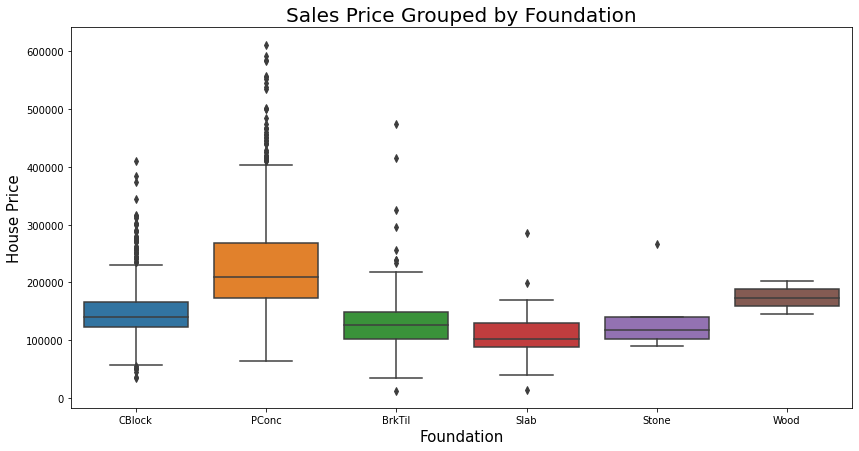

<Figure size 432x288 with 0 Axes>

In [38]:
# Foundation
plt.figure(figsize = (14, 7))
train_data["Foundation"].value_counts()
sns.boxplot( x=train_data["Foundation"], y=train_data["SalePrice"] );
plt.xlabel("Foundation", fontsize = 15);
plt.ylabel("House Price", fontsize = 15);
plt.title("Sales Price Grouped by Foundation", fontsize = 20);
plt.show()
plt.savefig('./plots/foundation.png')

**Interpretation**:
> - The house with PConc foundation have higher average price and the most expensive house is made of PConc foundation
> - There are few houses with wood foundation

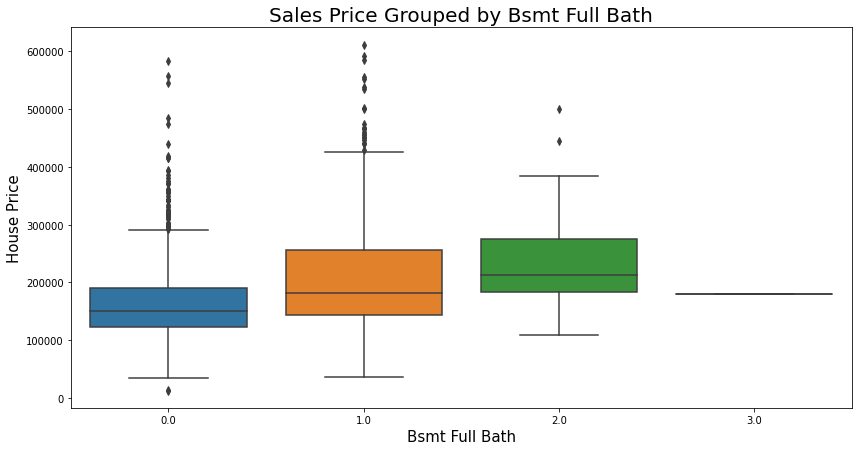

<Figure size 432x288 with 0 Axes>

In [39]:
# Group the house with Bsmt Full Bath
plt.figure(figsize = (14, 7))
sns.boxplot( x=train_data["Bsmt Full Bath"], y=train_data["SalePrice"] );
plt.xlabel("Bsmt Full Bath", fontsize = 15);
plt.ylabel("House Price", fontsize = 15);
plt.title("Sales Price Grouped by Bsmt Full Bath", fontsize = 20);
plt.show()
plt.savefig('./plots/bsmtfulbath_box.png')

**Interpretation**:
> - The house with O bsmt full bath has lower average price and most house bsmt full bath of 1 and 2
> - House with bsmt full bath of 2 has higehr average price compare to other bsm full bath

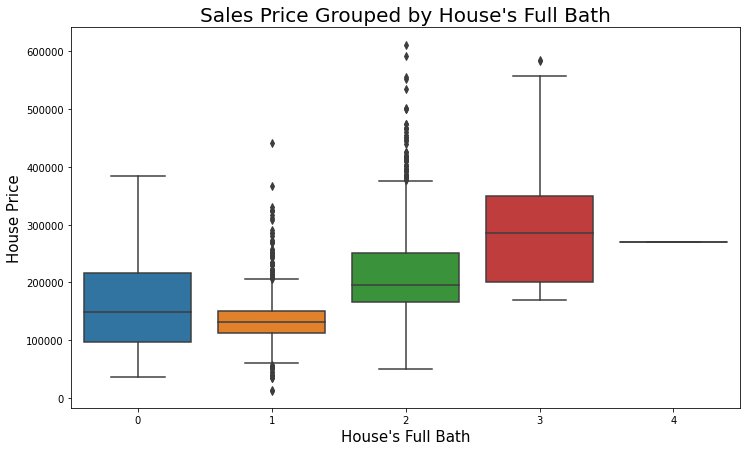

<Figure size 432x288 with 0 Axes>

In [40]:
## Plot the boxplot for house full bath
plt.figure(figsize = (12, 7));
sns.boxplot( x=train_data["Full Bath"], y=train_data["SalePrice"] );
plt.xlabel("House's Full Bath", fontsize = 15);
plt.ylabel("House Price", fontsize = 15);
plt.title("Sales Price Grouped by House's Full Bath", fontsize = 20);
plt.show()
plt.savefig('./plots/fullbath_box.png')

**Interpretation**:
> - Houses with 3 bath has higher average price and house with 1 full bath is less expensive than 0 full bath
> - There are may house without full bath

## Visualization With Scatter Plot

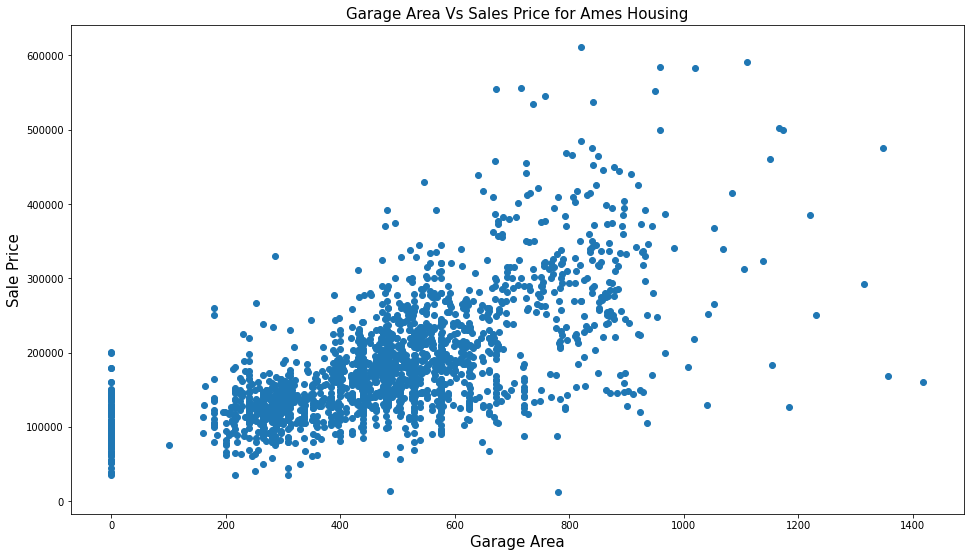

In [41]:
plt.figure(figsize = (16, 9));
plt.scatter(train_data["Garage Area"], train_data["SalePrice"]);
plt.xlabel("Garage Area", fontsize = 15);
plt.ylabel("Sale Price", fontsize = 15);
plt.title("Garage Area Vs Sales Price for Ames Housing", fontsize = 15);
plt.savefig('./plots/garagearea_scatter.png')

**Interpretation**:
> - Garage area have positive correlation with house price

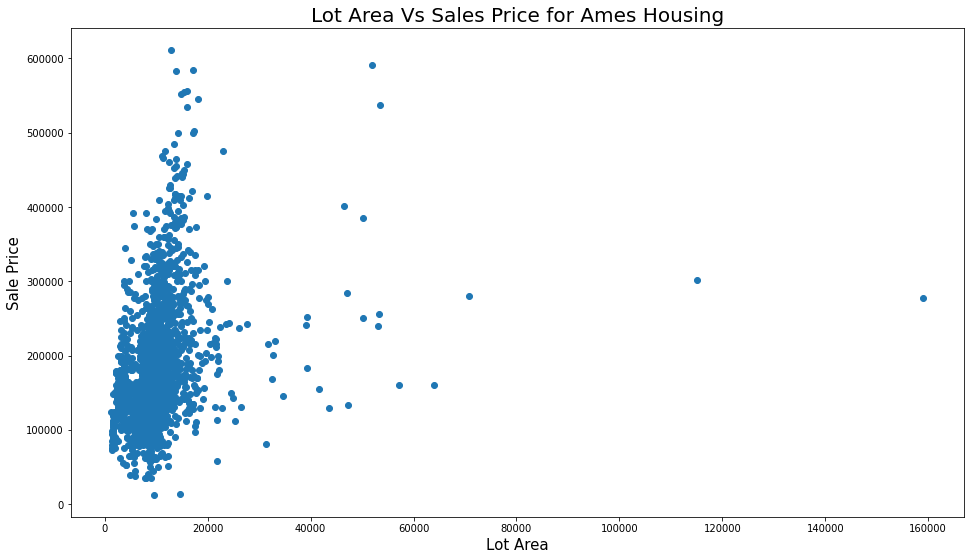

In [42]:
plt.figure(figsize = (16, 9));
plt.scatter(train_data["Lot Area"], train_data["SalePrice"]);
plt.xlabel("Lot Area", fontsize = 15);
plt.ylabel("Sale Price", fontsize = 15);
plt.title("Lot Area Vs Sales Price for Ames Housing", fontsize = 20);
plt.savefig('./plots/lotarea_scatter.png')

**Interpretation**:
> - The lot area have very strong positive correlation with house price

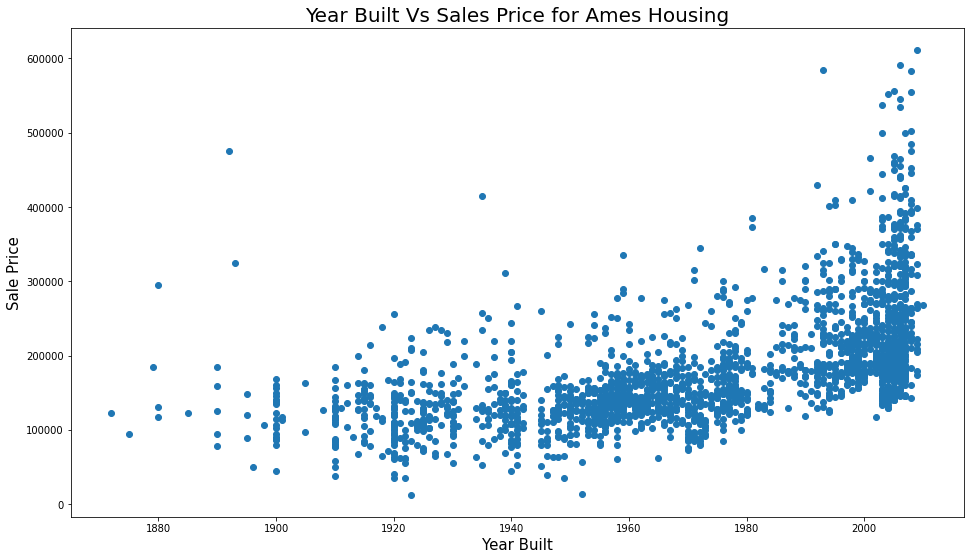

In [43]:
plt.figure(figsize = (16, 9));
plt.scatter(x="Year Built", y="SalePrice",data=train_data);
plt.xlabel("Year Built", fontsize = 15);
plt.ylabel("Sale Price", fontsize = 15);
plt.title("Year Built Vs Sales Price for Ames Housing", fontsize = 20);
plt.savefig('./plots/yearblt_scatter.png')

**Interpretation**:
> - The year of build have a weak positive correlation with the house sale price

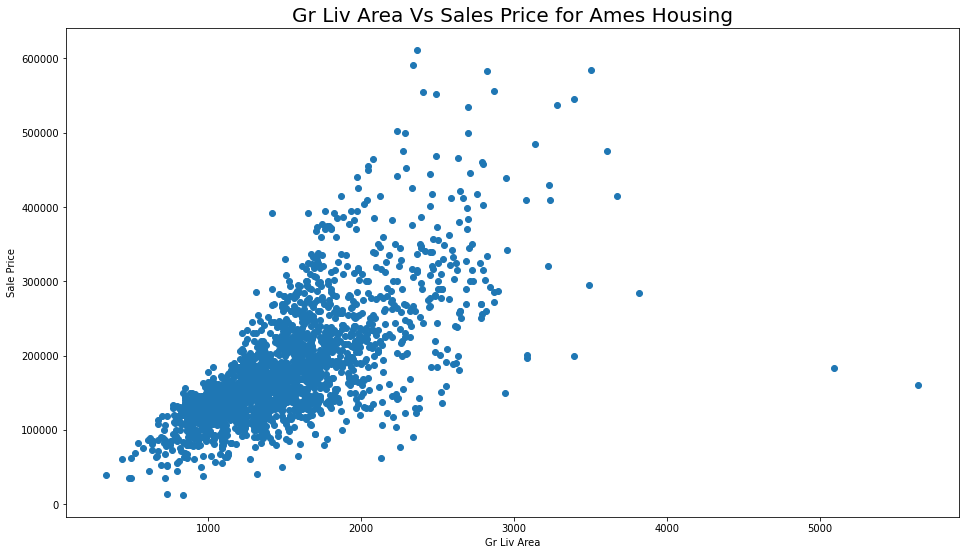

In [44]:
#'Mas Vnr Area'

plt.figure(figsize = (16, 9));
plt.scatter(x="Gr Liv Area", y="SalePrice",
            data=train_data);
plt.xlabel("Gr Liv Area");
plt.ylabel("Sale Price");
plt.title("Gr Liv Area Vs Sales Price for Ames Housing", fontsize = 20);
plt.savefig('./plots/grlivearea_scatter.png')

**Interpretation**:
> - The Gr live area has a strong positive correlation with the house sale price.

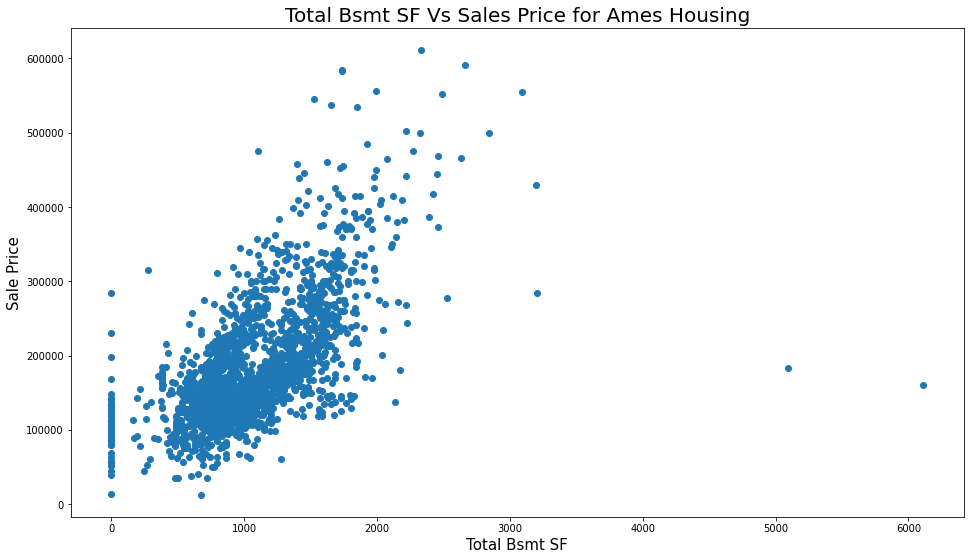

In [45]:
#Bedroom AbvGr
plt.figure(figsize = (16, 9));
plt.scatter(x="Total Bsmt SF", y="SalePrice",
            data=train_data);
plt.xlabel("Total Bsmt SF", fontsize = 15);
plt.ylabel("Sale Price", fontsize = 15);
plt.title("Total Bsmt SF Vs Sales Price for Ames Housing", fontsize = 20);
plt.savefig('./plots/totalbsmtsf_scatter.png')

**Interpretation**:
> - The total bsmt SF has very strong positive correlation with the house sale price.

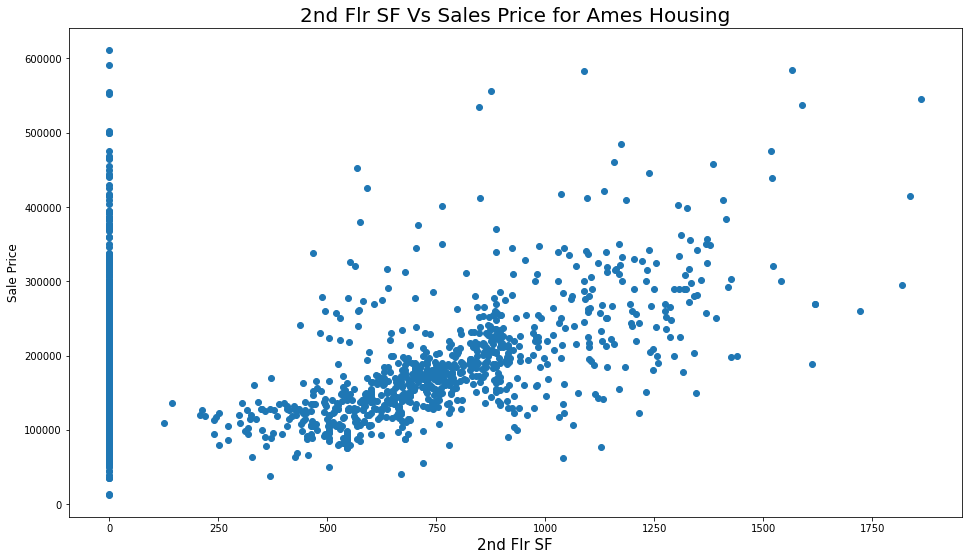

In [46]:
#House Style'
plt.figure(figsize = (16, 9));
plt.scatter(x="2nd Flr SF", y="SalePrice",
            data=train_data);
plt.xlabel("2nd Flr SF", fontsize = 15);
plt.ylabel("Sale Price", fontsize = 12);
plt.title("2nd Flr SF Vs Sales Price for Ames Housing", fontsize = 20);

**Interpretation**:
> - The 2nd FIr SF has positive correlation with the house sale price.

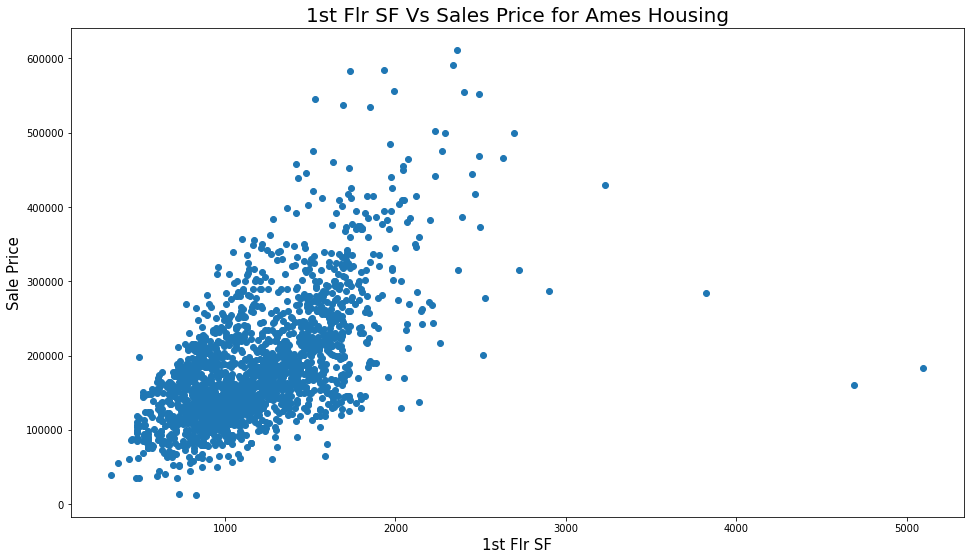

In [47]:
#House Style'
plt.figure(figsize = (16, 9));
plt.scatter(x="1st Flr SF", y="SalePrice",
            data=train_data);
plt.xlabel("1st Flr SF", fontsize = 15);
plt.ylabel("Sale Price", fontsize = 15);
plt.title("1st Flr SF Vs Sales Price for Ames Housing", fontsize = 20);

**Interpretation**:
> - The 1st FIr SF has very strong positive correlation with the house sale price.

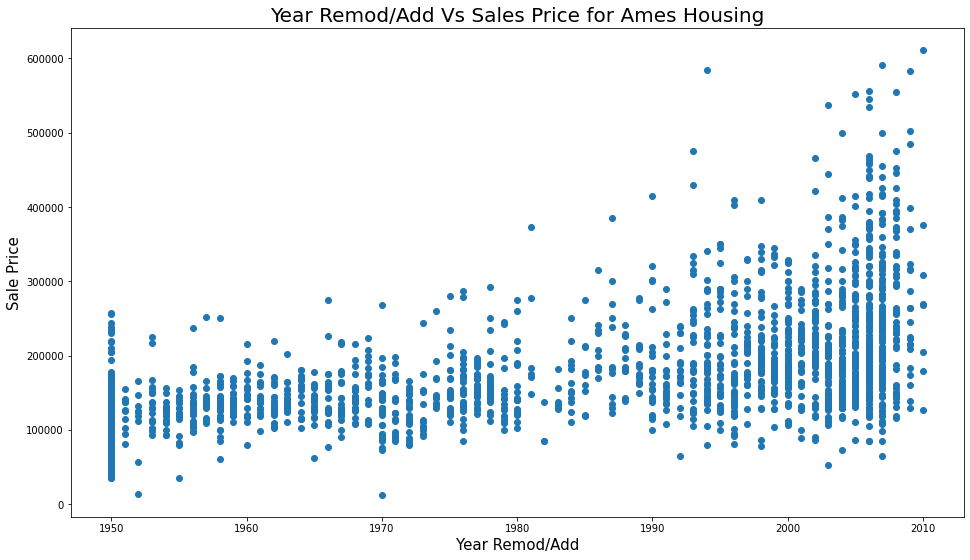

In [48]:
plt.figure(figsize = (16, 9));
plt.scatter(x="Year Remod/Add", y="SalePrice", data=train_data);
plt.xlabel("Year Remod/Add", fontsize = 15);
plt.ylabel("Sale Price", fontsize = 15);
plt.title("Year Remod/Add Vs Sales Price for Ames Housing", fontsize = 20);

**Interpretation**:
> - The Year Remod/Add has very weak positive correlation with the house sale price.

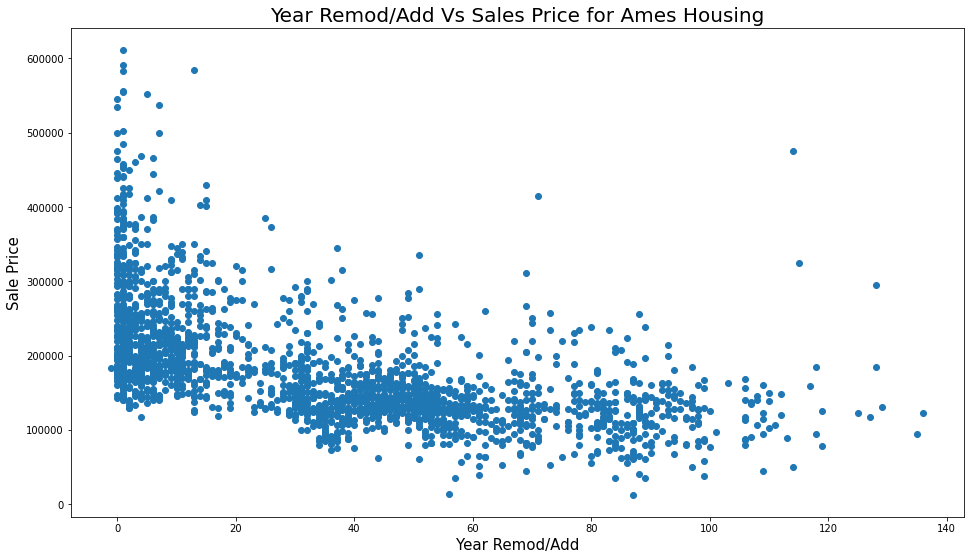

In [49]:
train_data["Age Sold"] = train_data["Yr Sold"] - train_data["Year Built"]
plt.figure(figsize = (16, 9));
plt.scatter(x="Age Sold", y="SalePrice", data=train_data);
plt.xlabel("Year Remod/Add", fontsize = 15);
plt.ylabel("Sale Price", fontsize = 15);
plt.title("Year Remod/Add Vs Sales Price for Ames Housing", fontsize = 20);
plt.savefig('./plots/agesold_scatter.png')

The oder the house the less price it is

## Bar plot Visualization

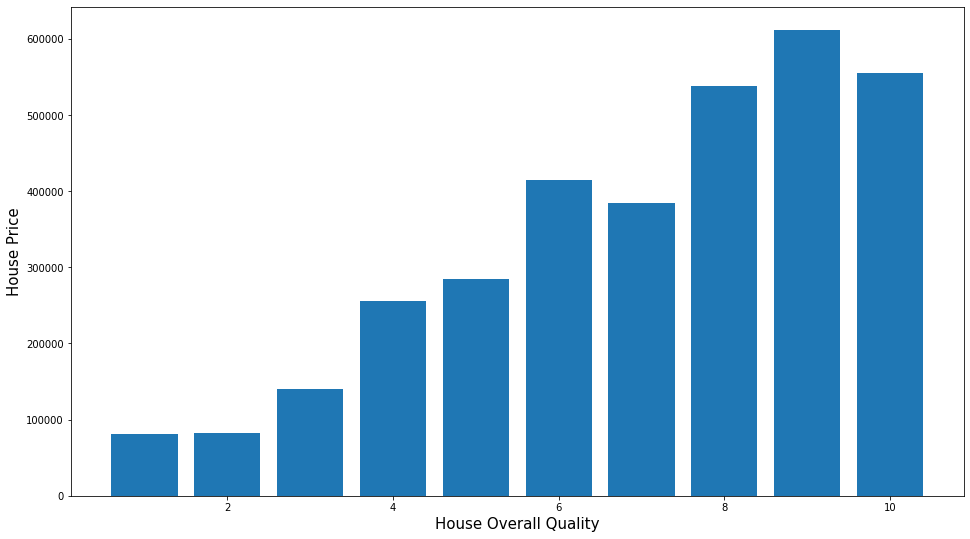

In [50]:
plt.figure(figsize = (16, 9));
plt.bar(x=train_data["Overall Qual"], height = train_data["SalePrice"],
            data=train_data);
plt.xlabel("House Overall Quality", fontsize = 15);
plt.ylabel("House Price", fontsize = 15);
plt.savefig('./plots/overallquality_bar.png')

**Interpretation**:
> - As the house quality increases so does the house price.
> - the real state should give more attention for the quality for the next houses.

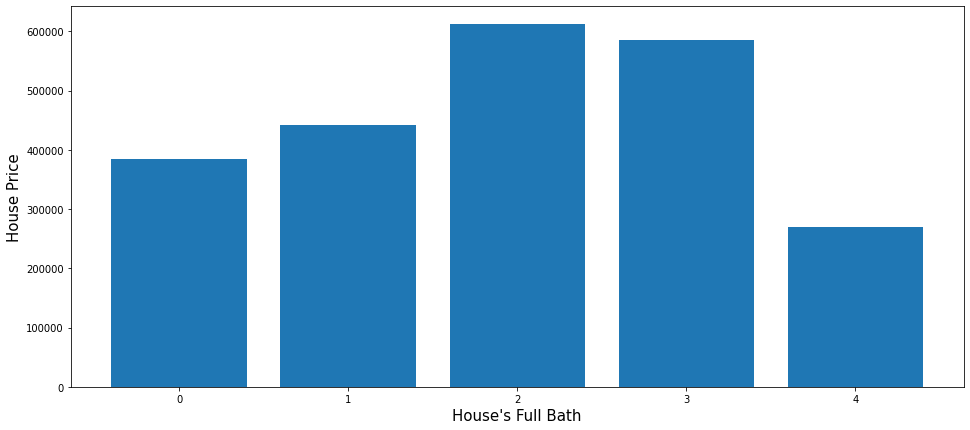

In [51]:
#Full Bath
plt.figure(figsize = (16, 7));
plt.bar(x=train_data["Full Bath"], height = train_data["SalePrice"], data=train_data);
plt.xlabel("House's Full Bath", fontsize = 15);
plt.ylabel("House Price", fontsize = 15);
plt.savefig('./plots/fullbath_bar.png')

**Interpretation**:
> - As the optimal number of full baths should be between 1 and 3 for better sale.

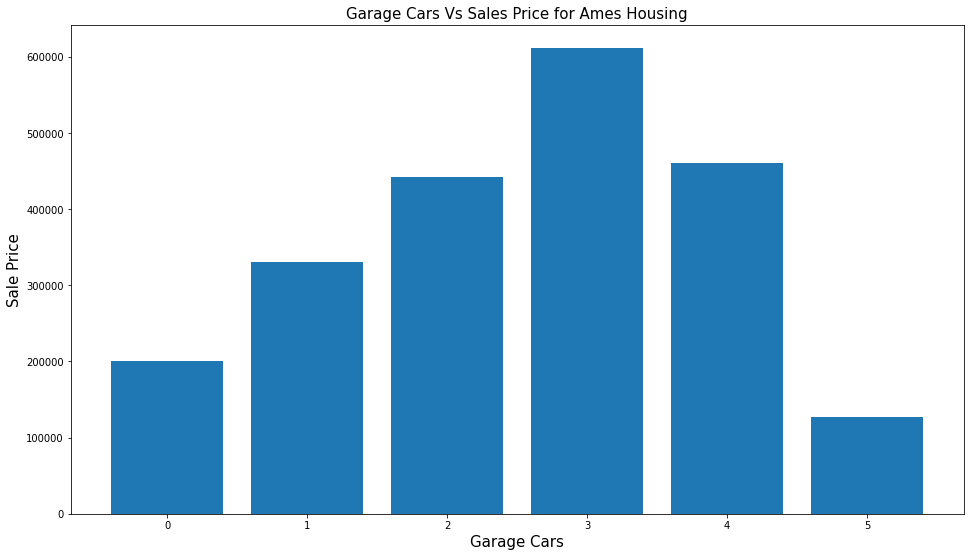

In [52]:
plt.figure(figsize = (16, 9));
plt.bar(x = train_data["Garage Cars"], height = train_data["SalePrice"]);
plt.xlabel("Garage Cars", fontsize = 15);
plt.ylabel("Sale Price", fontsize = 15);
plt.title("Garage Cars Vs Sales Price for Ames Housing", fontsize = 15);
plt.savefig('./plots/garagecar_bar.png')

**Interpretation**:
> - As the capacity garage increases the price increase for until 3 and after that it get deacreses.
> -  the optimal garage capacity will be in between 2 to 4.

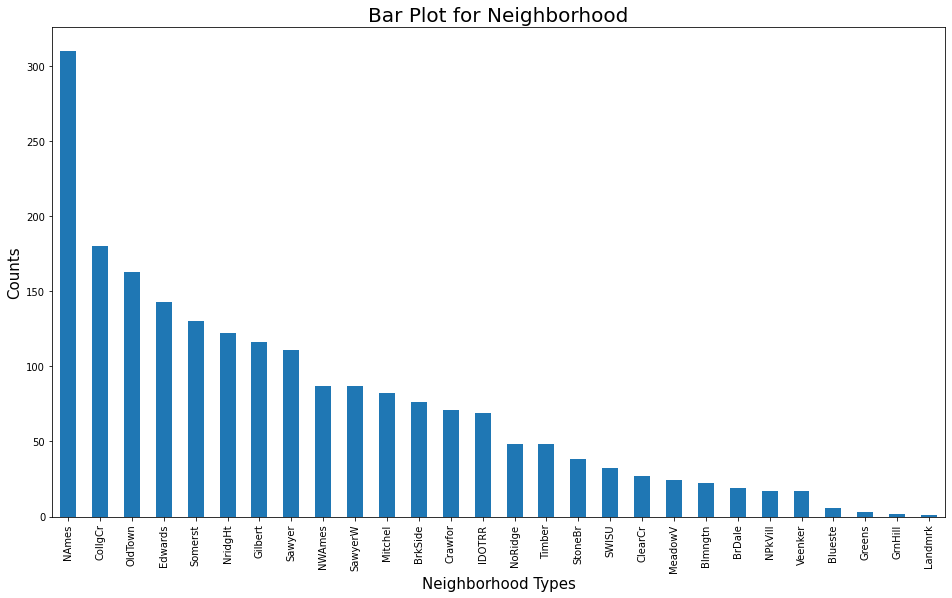

In [53]:
# Visualize how the neighborhood distributed
plt.figure(figsize = (16, 9));
train_data["Neighborhood"].value_counts().plot(kind = 'bar');
plt.xlabel("Neighborhood Types", fontsize = 15);
plt.ylabel("Counts", fontsize = 15);
plt.title("Bar Plot for Neighborhood", fontsize = 20);
plt.savefig('./plots/neighborhood_bar.png')

**Interpretation**:
> - Most of the house in this dataset are in NAmes folloed by CollgCr neighborhood.

In [54]:
# train_data.columns

In [55]:
# train_data.hist(figsize = (12,10), grid = False);
# plt.tight_layout();

In [56]:
# train_data['Paved Drive'].value_counts()

# Feature Engineerin & Preprocessing 

In [166]:
train_data.columns

Index(['TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Lot Area',
       'Total Bsmt SF', 'Overall Cond', 'Overall Qual', 'Gr Liv Area',
       'Age Sold', 'BsmtFin SF 2', 'SalePrice', '1st Flr SF'],
      dtype='object')

In [164]:
# train_data["Age Sold"] 

Id
109      34
544      13
153      57
318       4
255     110
       ... 
1587      1
785      69
916      81
639      53
10       11
Name: Age Sold, Length: 2051, dtype: int64

In [63]:
# train_data['Exterior 2nd'].value_counts()

In [165]:
# Create a new columns which is teh age of the house whe it is sold
train_data["Age Sold"] = train_data["Yr Sold"] - train_data["Year Built"]
test_data["Age Sold"] = test_data["Yr Sold"] - test_data["Year Built"]


KeyError: 'Yr Sold'

In [67]:
# drop the old columns
# train_data.drop(["Year Built", "Yr Sold"], axis = 1, inplace = True)
# test_data.drop(["Year Built", "Yr Sold"], axis= 1, inplace = True)

In [68]:
feat = ['House Style',"Foundation","Functional", 'Exter Qual', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
'Garage Area', 'Garage Qual', 'Lot Area', 'Neighborhood', 'Total Bsmt SF', 
'Overall Cond','Overall Qual', 'Gr Liv Area', 'Bsmt Exposure', 'Electrical', "Age Sold"
, 'BsmtFin SF 2', 'Bsmt Qual', 'Bldg Type', 'Lot Config', "SalePrice", "Heating QC",  "Garage Finish", "1st Flr SF"]


feat_test = ['House Style',"Foundation","Functional",  'Exter Qual', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
'Garage Area', 'Garage Qual',  'Lot Area', 'Neighborhood', 'Total Bsmt SF', 
'Overall Cond','Overall Qual',  'Bsmt Exposure', 'Electrical',
 'BsmtFin SF 2', 'Bsmt Qual', 'Bldg Type', 'Lot Config', "Age Sold", "Heating QC", "Gr Liv Area", "Garage Finish", "1st Flr SF"]

In [69]:
len(feat), len(feat_test)

(26, 25)

In [70]:
#selectfeatures
train_data = train_data.loc[:, feat]
test_data = test_data.loc[:, feat_test]

In [71]:
train_data.head()

,House Style,Foundation,Functional,Exter Qual,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Area,Garage Qual,Lot Area,...,Electrical,Age Sold,BsmtFin SF 2,Bsmt Qual,Bldg Type,Lot Config,SalePrice,Heating QC,Garage Finish,1st Flr SF
Id,,,,,,,,,,,,,,,,,,,,,
109,2Story,CBlock,Typ,Gd,Gd,6,0,475.0,TA,13517,...,SBrkr,34,0.0,TA,1Fam,CulDSac,130500,Ex,RFn,725
544,2Story,PConc,Typ,Gd,Gd,8,1,559.0,TA,11492,...,SBrkr,13,0.0,Gd,1Fam,CulDSac,220000,Ex,RFn,913
153,1Story,CBlock,Typ,TA,Gd,5,0,246.0,TA,7922,...,SBrkr,57,0.0,TA,1Fam,Inside,109000,TA,Unf,1057
318,2Story,PConc,Typ,TA,TA,7,0,400.0,TA,9802,...,SBrkr,4,0.0,Gd,1Fam,Inside,174000,Gd,Fin,744
255,1.5Fin,PConc,Typ,TA,TA,6,0,484.0,TA,14235,...,SBrkr,110,0.0,Fa,1Fam,Inside,138500,TA,Unf,831


In [72]:
# select columns to make dummy
dummy_cols = ["Foundation", "House Style", "Kitchen Qual",  "Electrical", "Bsmt Qual"
              , 'Exter Qual',"Garage Qual", "Neighborhood","Lot Config", "Bsmt Exposure","Bldg Type", "Functional", "Heating QC","Garage Finish" ]

train_dummy = pd.get_dummies(train_data[dummy_cols], drop_first = True)
test_dummy = pd.get_dummies(test_data[dummy_cols], drop_first = True)

In [73]:
train_data.drop(dummy_cols, axis =1,  inplace = True)
test_data.drop(dummy_cols, axis = 1, inplace = True)

In [74]:
train_data.columns

Index(['TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Lot Area',
       'Total Bsmt SF', 'Overall Cond', 'Overall Qual', 'Gr Liv Area',
       'Age Sold', 'BsmtFin SF 2', 'SalePrice', '1st Flr SF'],
      dtype='object')

In [75]:
# train_dummy.columns

In [76]:
train_dummy.shape, test_dummy.shape

((2051, 83), (878, 78))

In [77]:
set(train_dummy)-set(test_dummy)

{'Electrical_Mix',
 'Functional_Sal',
 'Functional_Sev',
 'Garage Qual_Fa',
 'Heating QC_Po',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk'}

In [78]:
#chech the traing and testing columns difference
missing_columns_train = list(set(test_dummy)-set(train_dummy))
missing_columns_test = list(set(train_dummy)-set(test_dummy))

In [79]:
missing_columns_train

['Electrical_FuseA', 'Kitchen Qual_Po']

In [80]:
 missing_columns_test

['Heating QC_Po',
 'Electrical_Mix',
 'Functional_Sev',
 'Garage Qual_Fa',
 'Functional_Sal',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk']

### Matching the columns in traing with testing datasets

In [81]:
# Code from our class with Noah, 4.07 lecture
for col in missing_columns_train:
    train_dummy[col] = 0

In [82]:
# Code from our class with Noah
for col in missing_columns_test:
    test_dummy[col] = 0

In [83]:
train_dummy.shape, test_dummy.shape

((2051, 85), (878, 85))

In [84]:
train_data.head()

,TotRms AbvGrd,Fireplaces,Garage Area,Lot Area,Total Bsmt SF,Overall Cond,Overall Qual,Gr Liv Area,Age Sold,BsmtFin SF 2,SalePrice,1st Flr SF
Id,,,,,,,,,,,,
109,6,0,475.0,13517,725.0,8,6,1479,34,0.0,130500,725
544,8,1,559.0,11492,913.0,5,7,2122,13,0.0,220000,913
153,5,0,246.0,7922,1057.0,7,5,1057,57,0.0,109000,1057
318,7,0,400.0,9802,384.0,5,5,1444,4,0.0,174000,744
255,6,0,484.0,14235,676.0,8,6,1445,110,0.0,138500,831


#### Update the training and testing datasets


In [85]:
# merge teh dummy feature tor the trainging
train_data_full = train_data.join(train_dummy)

In [86]:
train_data_full.dtypes

TotRms AbvGrd          int64
Fireplaces             int64
Garage Area          float64
Lot Area               int64
Total Bsmt SF        float64
                      ...   
Garage Finish_Fin      uint8
Garage Finish_RFn      uint8
Garage Finish_Unf      uint8
Electrical_FuseA       int64
Kitchen Qual_Po        int64
Length: 97, dtype: object

In [87]:
# test_data.isna().sum()

In [88]:
# Testing data
X_kaggle = test_data.join(test_dummy)

In [89]:
# train_data_full .head()

# Modeling

In [90]:
# Define X and y, features, list of features to included on our model
y = train_data_full["SalePrice"]
X= train_data_full.drop("SalePrice", axis = 1)

In [91]:
# Train Test split  and check the shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 57)
print(X_train.shape)
print(X_test.shape)

(1538, 96)
(513, 96)


> ## Baseline model

In [92]:
## Baseline model for comparison
# We can think of our baseline model as naive model that always predict the mean of out target
baseline_train = [y_train.mean()]*len(y_train)
baseline_test = [y_train.mean()]*len(y_test)

In [93]:
y_train.shape

(1538,)

> ### Baseline Eval

In [94]:
print(f"Baseline RMSE Train: {mean_squared_error(y_train, baseline_train)**.5} ")
print(f"Baseline RMSE Test: {mean_squared_error(y_test, baseline_test)**.5} ")

Baseline RMSE Train: 78434.16050899954 
Baseline RMSE Test: 81625.42755301508 


> ## Sklearn Modeling

In [95]:
## Linear Regression
lnm = LinearRegression()
lnm.fit(X_train, y_train)

LinearRegression()

In [96]:
# Evaluate model on bith training and tetsing data using RMSE
print(f"Train RMSE: {mean_squared_error(y_train, lnm.predict(X_train))**0.5}")
print(f"Test RMSE: {mean_squared_error(y_test, lnm.predict(X_test))**0.5}")

Train RMSE: 26801.872835811842
Test RMSE: 26886.048918606375


In [97]:
#evaluate the significance of the model R squared
print(f"R2 trainin: {lnm.score(X_train, y_train)}")
print(f"R2 testing: {lnm.score(X_test, y_test)}")

R2 trainin: 0.8832330922108101
R2 testing: 0.8912965283275333


In [98]:
## Look at the Coefs' for each feature
lnm.coef_

array([ 1.72347684e+02,  7.66403064e+03,  2.88367335e+01,  2.79942669e-01,
        1.23675107e+00,  5.74837805e+03,  7.81927826e+03,  5.04749587e+01,
       -3.21740891e+02,  1.05848211e+01, -1.15249775e+01, -2.20868017e+03,
        5.65570587e+03, -1.91501857e+03,  6.74615155e+03,  6.02203410e+03,
        3.14013438e+03,  1.25300629e+04,  8.22041393e+03,  8.71007790e+03,
       -5.45515798e+03,  3.50605462e+03, -3.44425145e+03, -3.86597940e+04,
       -2.80816329e+04, -3.21425002e+04,  1.25087015e+03,  1.60406958e+03,
        2.20932816e+04, -1.48818439e+03,  2.79051196e+04,  8.43609600e+03,
        1.10102466e+04,  6.20803910e+03,  1.14095694e+04, -2.67829937e+04,
       -2.46668442e+04, -2.71938170e+04, -4.18580776e+04, -9.69606165e+03,
       -6.49012744e+04, -3.99223606e+04, -2.87768748e+03,  9.13850451e+03,
       -1.56699131e+04, -7.32829451e+03, -7.67321155e+03,  9.61508082e+03,
       -2.33496008e+04, -1.11931727e+04,  1.84485625e+03,  1.00930502e+05,
       -2.31649300e+04,  

In [100]:
## Let's make that little easier to read
coef_df = pd.DataFrame({
    "columns": X.columns,
    "coef": lnm.coef_
})

In [101]:
coef_df.shape

(96, 2)

In [102]:
coef_df.tail()

,columns,coef
91,Garage Finish_Fin,-1436.013739
92,Garage Finish_RFn,-6616.043488
93,Garage Finish_Unf,-5408.674484
94,Electrical_FuseA,0.000000
95,Kitchen Qual_Po,0.000000


In [103]:
coef_df.iloc[94:97, 0]

94    Electrical_FuseA
95     Kitchen Qual_Po
Name: columns, dtype: object

In [104]:
coef_df.sort_values("coef", ascending = False).head(15)

,columns,coef
51,Neighborhood_GrnHill,100930.502485
66,Neighborhood_StoneBr,55003.826436
59,Neighborhood_NoRidge,42510.996120
60,Neighborhood_NridgHt,40662.772054
30,Bsmt Qual_Ex,27905.119636
28,Electrical_Mix,22093.281609
73,Bsmt Exposure_Gd,18371.625990
65,Neighborhood_Somerst,14923.136764
86,Functional_Typ,14872.846750
81,Functional_Min1,13727.117475


In [105]:
coef_df.sort_values("coef", ascending = False).tail(5)

,columns,coef
85,Functional_Sev,-36470.902996
23,Kitchen Qual_Fa,-38659.794033
41,Garage Qual_TA,-39922.360552
38,Garage Qual_Fa,-41858.077615
40,Garage Qual_Po,-64901.274423


<!-- Need to try -->

### Use Linear Reg model to make a prediction on the test dataset

In [106]:
# X_kaggle.head()

In [107]:
## make the prediction
X_kaggle["SalePrice"] = lnm.predict(X_kaggle)

In [108]:
# X_kaggle.head()

In [109]:
## The final values for submissions
output = X_kaggle[["SalePrice"]]

In [110]:
output.head()

,SalePrice
Id,
2658,108673.168536
2718,116598.854537
2414,157929.279361
1989,186247.470680
625,173932.532357


In [111]:
output.to_csv("./datasets/six_lnm_submission.csv")
dat = pd.read_csv("./datasets/six_lnm_submission.csv")

In [112]:
dat.head()

,Id,SalePrice
0,2658,108673.168536
1,2718,116598.854537
2,2414,157929.279361
3,1989,186247.470680
4,625,173932.532357


## Modeling With LASSO

In [113]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV

In [135]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso = LassoCV(alphas = l_alphas, cv = 5,
                   max_iter = 5000, tol = 0.0015)

# Fit model using best ridge alpha!


In [136]:
#fit the lasso model
lasso.fit(Z_train, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=5000, tol=0.0015)

In [137]:
# see the coefficient we have
lasso.coef_

array([   275.7117744 ,   4850.12584919,   6282.9344504 ,   1955.6867397 ,
          576.65874002,   6398.9708347 ,  11253.21253956,  25245.18556533,
        -9724.76330005,   1757.24718612,  -4536.38408872,  -1087.82694777,
         2808.64969061,   -244.29297548,    383.75871923,    215.64445768,
          222.93905795,   6248.00473782,    472.9522797 ,    766.8905189 ,
        -2455.9926464 ,    581.15698598,   -677.55357038,  -5761.18561909,
       -13691.24733279, -16063.15095359,    144.30968028,     79.81883785,
          559.41298402,   -412.12914009,   8045.09153478,   1402.33676514,
         5313.61610454,    151.61564178,   5561.91891297,  -2953.95149736,
       -11685.76146298, -13274.6575823 ,  -8110.39697324,   -825.67799557,
        -2323.97010473,  -8693.78993976,   -139.17146162,    910.533776  ,
        -3018.27400948,   -828.85749775,  -2063.87564928,   1768.92149638,
        -5892.42830756,  -2613.74081789,     85.28934351,   2570.57882262,
        -4147.33049115,  

In [138]:
#signinificance of the model in captureing the features that contribute for the changes in the taget
print(f"R2 for training with lasso:{lasso.score(Z_train, y_train)}")
print(f"R2 for testing lass: {lasso.score(Z_test, y_test)}")

R2 for training with lasso:0.8832329071213288
R2 for testing lass: 0.8913095120301144


In [139]:
# predict base on the testing
pred = lasso.predict(Z_train)

In [140]:
# check the accuracy of the model, how much the predict value off from the actual
print(f"Train lasso RMSE: {mean_squared_error(y_train, lasso.predict(Z_train))**0.5}")
print(f"Test lasso RMSE: {mean_squared_error(y_test, lasso.predict(Z_test))**0.5}")

Train lasso RMSE: 26801.89407788663
Test lasso RMSE: 26884.443216039268


### Apply GridSearch for the Lasso

In [141]:
# from Noah lecture on hyperparameter and gridseach, 4.07
lasso_params = {"alpha":np.logspace(-3, 0, 100)}
grid_model = GridSearchCV(estimator = Lasso(), param_grid = lasso_params, cv = 5, verbose = 1)

In [142]:
import sys
import warnings # remove unwated warning
if not sys.warnoptions:
    warnings.simplefilter("ignore")
grid_model.fit(Z_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   24.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ])},
             verbose=1)

In [143]:
grid_model.best_score_

0.8493345395126589

In [144]:
grid_model.best_estimator_.coef_

array([   275.66364059,   4850.1135038 ,   6283.09353656,   1955.78673265,
          574.43536227,   6399.00913434,  11252.73267184,  25244.52533634,
        -9724.11772254,   1757.26014688,  -4534.27727534,  -1087.57905301,
         2808.85279349,   -242.71528579,    383.75422546,    215.66467696,
          222.90408634,   6247.62166957,    472.97317316,    766.89799706,
        -2455.94686687,    580.81805948,   -677.8644263 ,  -5761.19485172,
       -13691.19768061, -16063.0925587 ,    144.33193242,     79.95293018,
          559.42223232,   -412.23030127,   8051.23731288,   1405.34713782,
         5323.45585316,    151.99235708,   5571.05695328,  -2953.98553629,
       -11686.1776507 , -13275.17306268,  -8110.64740436,   -825.89952463,
        -2324.07471789,  -8694.08134534,   -139.36235641,    910.20567212,
        -3019.24756754,   -829.33396397,  -2064.99393136,   1768.00381806,
        -5893.51968728,  -2614.70573331,     85.1482641 ,   2570.84278858,
        -4148.18801619,  

In [145]:
y_pred_test = grid_model.predict(Z_test)

In [146]:
grid_pred = grid_model.predict(Z_train)
mean_squared_error(y_train, grid_pred)**.5

26801.89288337119

In [147]:
print(grid_model.score(Z_train, y_train))
print(grid_model.score(Z_test, y_test))

0.8832329175295554
0.8913088221628738


In [148]:
# grid_model.coef

**Strong R2 values:** the 88% variability in the house prices are due to the feature we selected in our model. 

In [149]:
print(f"Train RMSE: {mean_squared_error(y_train, grid_model.predict(Z_train))**0.5}")
print(f"Test RMSE: {mean_squared_error(y_test, grid_model.predict(Z_test))**0.5}")

Train RMSE: 26801.89288337119
Test RMSE: 26884.52853476206


On average the predict value of off from the actual value by almost 27000

In [150]:
# grid_model
grid_coef_df = pd.DataFrame({
    "columns": X.columns,
    "coef": grid_model.best_estimator_.coef_
})
grid_coef_df = grid_coef_df.sort_values("coef", ascending = False)

In [151]:
grid_coef_df.head()

,columns,coef
7,Gr Liv Area,25244.525336
6,Overall Qual,11252.732672
60,Neighborhood_NridgHt,9921.375242
30,Bsmt Qual_Ex,8051.237313
66,Neighborhood_StoneBr,7749.943942


In [152]:
 grid_coef_df.tail()

,columns,coef
8,Age Sold,-9724.117723
36,Exter Qual_Gd,-11686.177651
37,Exter Qual_TA,-13275.173063
24,Kitchen Qual_Gd,-13691.197681
25,Kitchen Qual_TA,-16063.092559


**Interprete top features**:
- Gr Liv Area: A one unit increase in Gr Liv Area of the house we expect the house price increased by \$25244, all else hold constant
- Overall Qual: A one unit increase in Overall Qual of the house we expect the house price increased by \$11252, all else hold constant
- Neighborhood_GrnHil: A 1 unit increase in Neighborhood_GrnHil the house price predicted to increase by \$9921., all else hold constant or keep equal.
- Neighborhood_StoneB: A 1 unit increase in Neighborhood_StoneB of a house, we expect the price increased by \$7749, all else keep constant or equal.
- Age Sold: A 1 unit older of a house, we expect the price decreased by \$9274., all else keep constant or equal.
- Kitchen Qual_TA: A one unit increase in Kitchen Qual_TA, we expect the house price will decreased by \$16000.
- Kitchen Qual_Gd: A one unit increase in Kitchen Qual_Gd, we expect the house price will decreased by \$13690.

# Lasso Grid Search prediction


In [155]:
X_kaggle.columns

Index(['TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Lot Area',
       'Total Bsmt SF', 'Overall Cond', 'Overall Qual', 'BsmtFin SF 2',
       'Age Sold', 'Gr Liv Area', '1st Flr SF', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'House Style_1.5Unf', 'House Style_1Story',
       'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
       'House Style_SFoyer', 'House Style_SLvl', 'Kitchen Qual_Fa',
       'Kitchen Qual_Gd', 'Kitchen Qual_Po', 'Kitchen Qual_TA',
       'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_SBrkr', 'Bsmt Qual_Ex', 'Bsmt Qual_Fa', 'Bsmt Qual_Gd',
       'Bsmt Qual_Po', 'Bsmt Qual_TA', 'Exter Qual_Fa', 'Exter Qual_Gd',
       'Exter Qual_TA', 'Garage Qual_Gd', 'Garage Qual_Po', 'Garage Qual_TA',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
   

In [156]:
# Z_train = sc.fit_transform(X_train)
Z_kaggle = sc.transform(X_kaggle) #.drop("SalePrice", axis = 1))

ValueError: X has 97 features, but this StandardScaler is expecting 96 features as input.

In [157]:
X_kaggle["SalePrice"] = grid_model.predict(Z_kaggle)
output = X_kaggle[["SalePrice"]]

NameError: name 'Z_kaggle' is not defined

In [158]:
output.to_csv("./datasets/laso_grd3_submission.csv")
dat = pd.read_csv("./datasets/laso_grd3_submission.csv")

In [159]:
dat.head(10)

,Id,SalePrice
0,2658,108673.168536
1,2718,116598.854537
2,2414,157929.279361
3,1989,186247.470680
4,625,173932.532357
5,333,43323.503010
6,1327,129579.765687
7,858,93312.419921
8,95,151902.313897
9,1568,152335.050284


**Inference**:
- Both the Linear Regression and Lasso modeling perfom almost the same: They bothe have similar RMSE and R2 values both in our traing and testing datasets.The R2 vaue is very high, which shows the linear model perfome well.

**prediction**:
- Based on the current linear model metrics R2, RMSE and MSE values our model will predict the sale price very well.

## Evaluate Assumptioon For Linear Modeling

**L.I.N.E**

#### Linearit of features

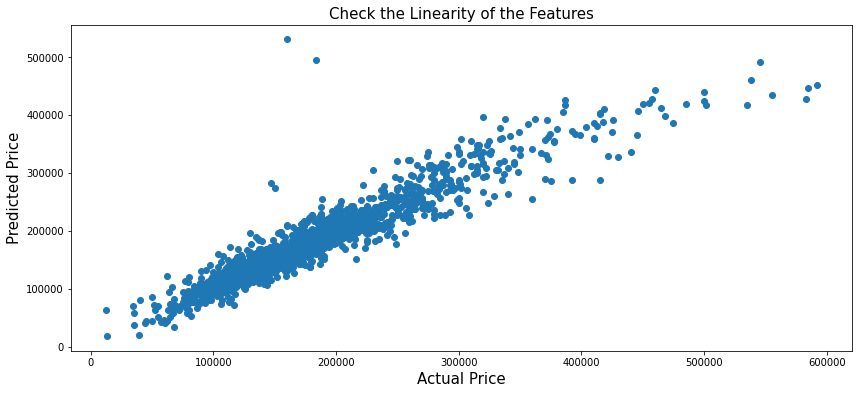

In [160]:
# Linearity check
plt.figure(figsize = (14, 6));
plt.scatter(y_train, grid_pred);
plt.xlabel("Actual Price", fontsize = 15);
plt.ylabel("Predicted Price", fontsize = 15);
plt.title("Check the Linearity of the Features", fontsize = 15);

The actual and predicted target variable has linear relation and the feature are linaerily related

**Independent** of each observation which they are our previous house price does not invoved in the current house price

**Normal distribution of Errors**

In [161]:
residual = y_train-grid_pred

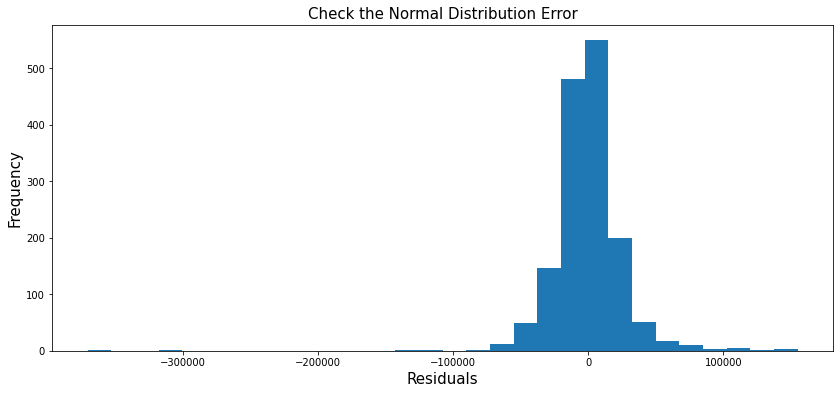

In [162]:
# The errore hs normal distribution
plt.figure(figsize = (14, 6));
plt.hist(residual, bins = 30);
plt.xlabel("Residuals", fontsize = 15);
plt.ylabel("Frequency", fontsize = 15);
plt.title("Check the Normal Distribution Error", fontsize = 15);

The residuals/ error are normaly distributed

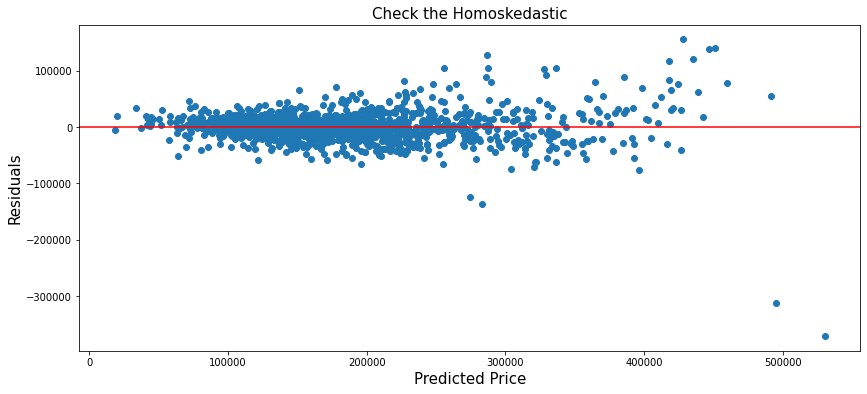

In [163]:
# Equality of variance 
plt.figure(figsize = (14, 6));
plt.scatter(grid_pred, residual);
plt.xlabel("Predicted Price", fontsize = 15);
plt.ylabel("Residuals", fontsize = 15);
plt.title("Check the Homoskedastic", fontsize = 15);
plt.axhline(0, color = 'red');

The variance in mosly equall from on ean to another end of our predict values

## Conclusion and Recommendations

The most valuable feature in this project  the Kichetchen Qulaity, Nieghborhood and GrLIvArea while Electrical_FuseA least valuable features based one the lasso and gridsearch model.

The linear model for predict the house price  based on different features. I has a features that explained the 88% variability in target value. I have used the baseline, linear regeression and lasso to predict the house, except the baseline model all the models have similar sognificance and accuracy.
Recomendation: In the future, I would add more feature interaction, add some columns such as school zone  and transform my target values to improve th R2 value and reducs the RMSE